# Import bibliotek, danych i wstępna anliza eksploracyjna

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

pd.options.display.float_format = "{:.2f}".format
data = pd.read_csv("Online Retail.csv", encoding = "ISO-8859-1", sep=';')
data['UnitPrice'] = data['UnitPrice'].str.replace(',', '.').astype(float)
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

data.shape
data.head(10)
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### UnitPrice <= 0
Usunięcie rzędów z UnitPrice ujemnymi lub zerowymi.

In [2]:
# Usunięto rzędy z pustymi wartościami CustomerID, InvoiceDate, Quantity, UnitPrice
data = data.dropna(subset = ['CustomerID', 'InvoiceDate', 'Quantity', 'UnitPrice'])

# Usunięto rzędy z UnitPrice i Quantity równym lub mniejszym od zera
data = data[data["UnitPrice"] > 0]
data = data[data["Quantity"] > 0]

## Usunięcie rzędów z opisami wskazującymi że nie są związane ze sprzedażą lub są błędne


In [3]:
data["Description"].nunique(dropna = False)
data["Description"] = data["Description"].str.strip()
data["Description"].nunique(dropna = False)
data["Description"].unique()
data = data[data["InvoiceNo"].str.startswith("C") == False]
data = data[data["Description"].isin(["Bank Charges", "CRUK Commission", 'Manual']) == False]
data = data[data["Description"].isin(["AMAZON FEE", "SAMPLES", "POSTAGE", "PACKING CHARGE", "DOTCOM", "CARRIAGE"]) == False]

## Wartości odstające

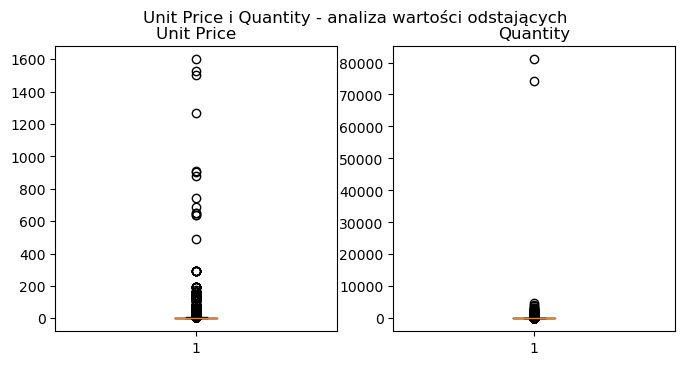

In [4]:
plt.style.use("default")
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,3.7))

ax1.boxplot(data["UnitPrice"])
ax1.set_title("Unit Price")
ax2.boxplot(data["Quantity"])
ax2.set_title("Quantity")
fig.suptitle("Unit Price i Quantity - analiza wartości odstających")
plt.show()

Widzimy kilka dużych wartości odstających.

Ponieważ istnieje wiele wartości poza zakresem międzykwartylowym, zostało sprawdzone ile wartości znajduje się poza 3 odchyleniami standardowymi. Analiza wartości znajdujących się poza 3 odchyleniami standardowymi pokazała transkacje, które nie wykazywały oznak szczególnych, oprócz dużych wartości liczbowych. Uznano że bez dodatkowej wiedzy nie jest możliwe stwierdzenie czy te transakcje były prawidłowe czy błędne dlatego użycie z-score jako środka do eliminacji wartości odstających uznano za odpowiednim rozwiązanie,.



In [5]:
z = np.abs(stats.zscore(data["Quantity"])) # calculate z-scores for Quantity
len(np.where(z>3)[0]) # how many values are outside 3 std.dev
z = np.abs(stats.zscore(data["UnitPrice"])) # calculate z-scores for UnitPrice
len(np.where(z>3)[0]) # how many values are outside 3 std.dev

636

Z powodu braku informacji o możliwych błędach przy dokonywaniu transakcji, w celu lepszej analizy zdecydowano na usnięcie tych wartości ze zbioru danych.